Enter number of integers: 50
Enter sorting method:
(b)ubble
(i)nsertion
(m)erge         
(q)uick
(s)election
s


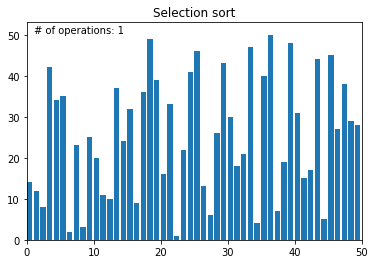

In [2]:
import random
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
# NOTE: Python version >=3.3 is required, due to "yield from" feature.

def swap(A, i, j):
    """Helper function to swap elements i and j of list A."""

    if i != j:
        A[i], A[j] = A[j], A[i]

def bubblesort(A):
    """In-place bubble sort."""

    if len(A) == 1:
        return

    swapped = True
    for i in range(len(A) - 1):
        if not swapped:
            break
        swapped = False
        for j in range(len(A) - 1 - i):
            if A[j] > A[j + 1]:
                swap(A, j, j + 1)
                swapped = True
            yield A

def insertionsort(A):
    """In-place insertion sort."""

    for i in range(1, len(A)):
        j = i
        while j > 0 and A[j] < A[j - 1]:
            swap(A, j, j - 1)
            j -= 1
            yield A

def mergesort(A, start, end):
    """Merge sort."""

    if end <= start:
        return

    mid = start + ((end - start + 1) // 2) - 1
    yield from mergesort(A, start, mid)
    yield from mergesort(A, mid + 1, end)
    yield from merge(A, start, mid, end)
    yield A

def merge(A, start, mid, end):
    """Helper function for merge sort."""
    
    merged = []
    leftIdx = start
    rightIdx = mid + 1

    while leftIdx <= mid and rightIdx <= end:
        if A[leftIdx] < A[rightIdx]:
            merged.append(A[leftIdx])
            leftIdx += 1
        else:
            merged.append(A[rightIdx])
            rightIdx += 1

    while leftIdx <= mid:
        merged.append(A[leftIdx])
        leftIdx += 1

    while rightIdx <= end:
        merged.append(A[rightIdx])
        rightIdx += 1

    for i, sorted_val in enumerate(merged):
        A[start + i] = sorted_val
        yield A

def quicksort(A, start, end):
    """In-place quicksort."""

    if start >= end:
        return

    pivot = A[end]
    pivotIdx = start

    for i in range(start, end):
        if A[i] < pivot:
            swap(A, i, pivotIdx)
            pivotIdx += 1
        yield A
    swap(A, end, pivotIdx)
    yield A

    yield from quicksort(A, start, pivotIdx - 1)
    yield from quicksort(A, pivotIdx + 1, end)

def selectionsort(A):
    """In-place selection sort."""
    if len(A) == 1:
        return

    for i in range(len(A)):
        # Find minimum unsorted value.
        minVal = A[i]
        minIdx = i
        for j in range(i, len(A)):
            if A[j] < minVal:
                minVal = A[j]
                minIdx = j
            yield A
        swap(A, i, minIdx)
        yield A

if __name__ == "__main__":
    # Get user input to determine range of integers (1 to N) and desired
    # sorting method (algorithm).
    N = int(input("Enter number of integers: "))
    method_msg = "Enter sorting method:\n(b)ubble\n(i)nsertion\n(m)erge \
        \n(q)uick\n(s)election\n"
    method = input(method_msg)

    # Build and randomly shuffle list of integers.
    A = [x + 1 for x in range(N)]
    random.seed(time.time())
    random.shuffle(A)

    # Get appropriate generator to supply to matplotlib FuncAnimation method.
    if method == "b":
        title = "Bubble sort"
        generator = bubblesort(A)
    elif method == "i":
        title = "Insertion sort"
        generator = insertionsort(A)
    elif method == "m":
        title = "Merge sort"
        generator = mergesort(A, 0, N - 1)
    elif method == "q":
        title = "Quicksort"
        generator = quicksort(A, 0, N - 1)
    else:
        title = "Selection sort"
        generator = selectionsort(A)

    # Initialize figure and axis.
    fig, ax = plt.subplots()
    ax.set_title(title)

    # Initialize a bar plot. Note that matplotlib.pyplot.bar() returns a
    # list of rectangles (with each bar in the bar plot corresponding
    # to one rectangle), which we store in bar_rects.
    bar_rects = ax.bar(range(len(A)), A, align="edge")

    # Set axis limits. Set y axis upper limit high enough that the tops of
    # the bars won't overlap with the text label.
    ax.set_xlim(0, N)
    ax.set_ylim(0, int(1.07 * N))

    # Place a text label in the upper-left corner of the plot to display
    # number of operations performed by the sorting algorithm (each "yield"
    # is treated as 1 operation).
    text = ax.text(0.02, 0.95, "", transform=ax.transAxes)

    # Define function update_fig() for use with matplotlib.pyplot.FuncAnimation().
    # To track the number of operations, i.e., iterations through which the
    # animation has gone, define a variable "iteration". This variable will
    # be passed to update_fig() to update the text label, and will also be
    # incremented in update_fig(). For this increment to be reflected outside
    # the function, we make "iteration" a list of 1 element, since lists (and
    # other mutable objects) are passed by reference (but an integer would be
    # passed by value).
    # NOTE: Alternatively, iteration could be re-declared within update_fig()
    # with the "global" keyword (or "nonlocal" keyword).
    iteration = [0]
    def update_fig(A, rects, iteration):
        for rect, val in zip(rects, A):
            rect.set_height(val)
        iteration[0] += 1
        text.set_text("# of operations: {}".format(iteration[0]))

    anim = animation.FuncAnimation(fig, func=update_fig,
        fargs=(bar_rects, iteration), frames=generator, interval=1,
        repeat=False)
    plt.show()


In [18]:
A = [x + 1 for x in range(37)]
random.seed(time.time())
random.shuffle(A)

In [19]:
A

[17,
 14,
 16,
 8,
 28,
 33,
 3,
 34,
 37,
 6,
 18,
 2,
 23,
 13,
 10,
 30,
 35,
 5,
 22,
 25,
 29,
 24,
 21,
 1,
 26,
 20,
 36,
 4,
 31,
 12,
 19,
 27,
 9,
 11,
 32,
 7,
 15]

Text(0.5, 1.0, 'title')

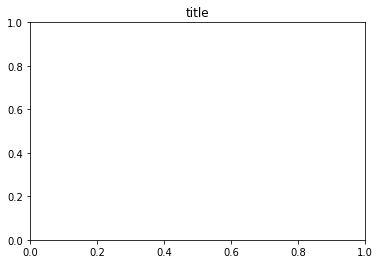

In [25]:
fig, ax = plt.subplots()
ax.set_title('title')

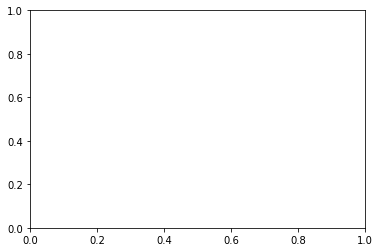

In [22]:
plt.subplot()

In [24]:
ax.set_title('title')

Text(0.5, 1.0, 'title')

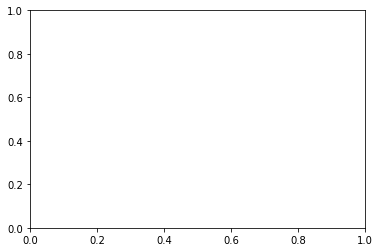

In [29]:
grp,ax = plt.subplots()


In [35]:
bars = ax.bar(range(38),34)

In [36]:
text = ax.text(0.02, 0.95, "", transform=ax.transAxes)

In [37]:
text

Text(0.02, 0.95, '')

Text(0.5, 1.0, 'Simple plot')

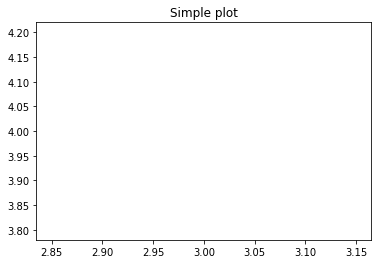

In [43]:
fig, ax = plt.subplots()
ax.plot(3, 4)
ax.set_title('Simple plot')


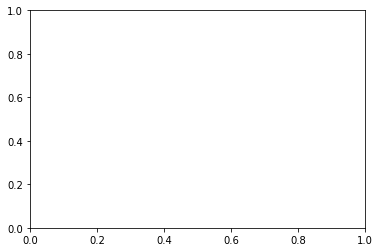

In [55]:
plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

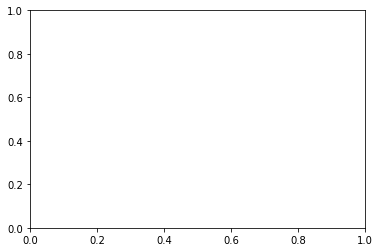

In [57]:
plt.subplot(1,1,1)

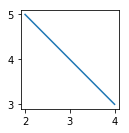

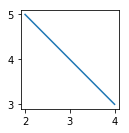

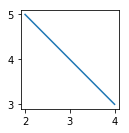

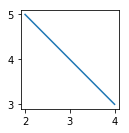

In [63]:
plt.subplot(2,3,1)
plt.plot([2,3,4],[5,4,3])
plt.show()
plt.subplot(2,3,4)
plt.plot([2,3,4],[5,4,3])
plt.show()
plt.subplot(2,3,3)
plt.plot([2,3,4],[5,4,3])
plt.show()
plt.subplot(2,3,2)
plt.plot([2,3,4],[5,4,3])
plt.show()

<BarContainer object of 30 artists>

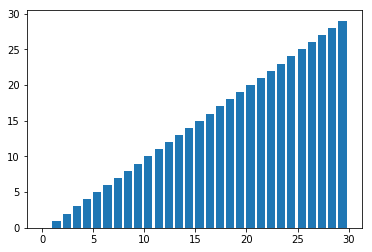

In [96]:
a = [c for c in range(30)]
fig,axis = plt.subplots()
axis.bar(range(len(a)),a,align = "edge")

<BarContainer object of 30 artists>

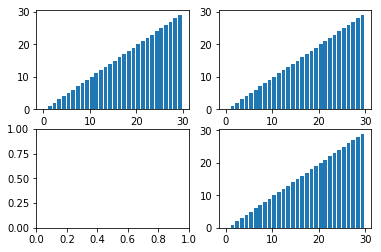

In [97]:
b = [c for c in range(30)]
fig,axis = plt.subplots(2,2)
axis[0,1].bar(range(len(b)),b,align = "edge")
axis[0,0].bar(range(len(b)),b,align = "edge")
axis[1,1].bar(range(len(b)),b,align = "edge")

In [98]:
random.shuffle(a)

In [99]:
b = [c +1 for c in range(30)]

In [100]:
a

[20,
 29,
 16,
 26,
 5,
 7,
 3,
 23,
 22,
 25,
 19,
 17,
 18,
 9,
 15,
 1,
 13,
 14,
 24,
 4,
 12,
 6,
 0,
 10,
 21,
 27,
 11,
 2,
 28,
 8]

In [101]:
zip(a,b)

In [102]:
for i,j in zip(a,b):
    print('i: {}   ,j : {}'.format(i,j))

i: 20   ,j : 1
i: 29   ,j : 2
i: 16   ,j : 3
i: 26   ,j : 4
i: 5   ,j : 5
i: 7   ,j : 6
i: 3   ,j : 7
i: 23   ,j : 8
i: 22   ,j : 9
i: 25   ,j : 10
i: 19   ,j : 11
i: 17   ,j : 12
i: 18   ,j : 13
i: 9   ,j : 14
i: 15   ,j : 15
i: 1   ,j : 16
i: 13   ,j : 17
i: 14   ,j : 18
i: 24   ,j : 19
i: 4   ,j : 20
i: 12   ,j : 21
i: 6   ,j : 22
i: 0   ,j : 23
i: 10   ,j : 24
i: 21   ,j : 25
i: 27   ,j : 26
i: 11   ,j : 27
i: 2   ,j : 28
i: 28   ,j : 29
i: 8   ,j : 30


In [103]:
animation.FuncAnimation()

TypeError: __init__() missing 2 required positional arguments: 'fig' and 'func'

In [104]:
p = axis[0,1].text(2,1,"")

In [105]:
p.set_text('Text Set: ')

In [106]:
plt.show()

<BarContainer object of 3 artists>

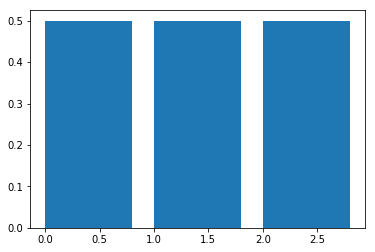

In [113]:
fig,ax = plt.subplots()
ax.bar(range(3),0.5,0.8,align = "edge")

In [111]:
plt.show()

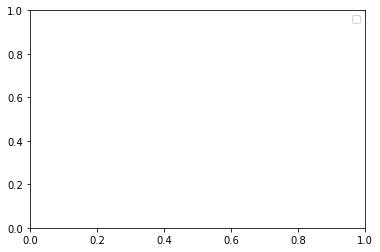

In [114]:
plt.legend('legend')

In [ ]:
ax.text()